In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
Data = {
    'Year (X)':[2000,2001,2002,2003,2004,2005,2006],
    'Production (Y)':[12,10,14,11,13,15,16]
}

In [4]:
df = pd.DataFrame(Data)

In [5]:
df

,Year (X),Production (Y)
0,2000,12
1,2001,10
2,2002,14
3,2003,11
4,2004,13
5,2005,15
6,2006,16


In [8]:
X = sum(df['Year (X)']) / len(df['Year (X)'])

In [9]:
X

2003.0

In [6]:
df['X'] = df['Year (X)']+df['Production (Y)']
df['X'] = np.nan

In [14]:
for i in range(len(df)):
     x = df['Year (X)'].iloc[i] - X
     df.at[i, 'X'] = x

In [15]:
df

,Year (X),Production (Y),X
0,2000,12,-3.0
1,2001,10,-2.0
2,2002,14,-1.0
3,2003,11,0.0
4,2004,13,1.0
5,2005,15,2.0
6,2006,16,3.0


In [16]:
df['X^2'] = df['X'] + df['Year (X)']+df['Production (Y)']
df['X^2'] = np.nan

In [18]:
for i in range(len(df)):
    df.at[i, 'X^2'] = df['X'].iloc[i] ** 2  

In [19]:
df

,Year (X),Production (Y),X,X^2
0,2000,12,-3.0,9.0
1,2001,10,-2.0,4.0
2,2002,14,-1.0,1.0
3,2003,11,0.0,0.0
4,2004,13,1.0,1.0
5,2005,15,2.0,4.0
6,2006,16,3.0,9.0


In [20]:
df['XY'] = df['X^2'] + df['X'] + df['Year (X)']+df['Production (Y)']
df['XY'] = np.nan

In [23]:
for i in range(len(df)):
     x = df['X'].iloc[i] * df['Production (Y)'].iloc[i]
     df.at[i, 'XY'] = x

In [24]:
df

,Year (X),Production (Y),X,X^2,XY
0,2000,12,-3.0,9.0,-36.0
1,2001,10,-2.0,4.0,-20.0
2,2002,14,-1.0,1.0,-14.0
3,2003,11,0.0,0.0,0.0
4,2004,13,1.0,1.0,13.0
5,2005,15,2.0,4.0,30.0
6,2006,16,3.0,9.0,48.0


In [25]:
df['Y = a + bx'] = df['XY'] + df['X^2'] + df['X'] + df['Year (X)']+df['Production (Y)']
df['Y = a + bx'] = np.nan

In [26]:
a = sum(df['Production (Y)']) / 7

In [27]:
a

13.0

In [28]:
b = sum(df['XY']) / sum(df['X^2'])

In [29]:
b

0.75

In [32]:
for i in range(len(df)):
    y = a + b * df['X'].iloc[i]
    df.at[i,'Y = a + bx'] = y

In [33]:
df

,Year (X),Production (Y),X,X^2,XY,Y = a + bx
0,2000,12,-3.0,9.0,-36.0,10.75
1,2001,10,-2.0,4.0,-20.0,11.50
2,2002,14,-1.0,1.0,-14.0,12.25
3,2003,11,0.0,0.0,0.0,13.00
4,2004,13,1.0,1.0,13.0,13.75
5,2005,15,2.0,4.0,30.0,14.50
6,2006,16,3.0,9.0,48.0,15.25


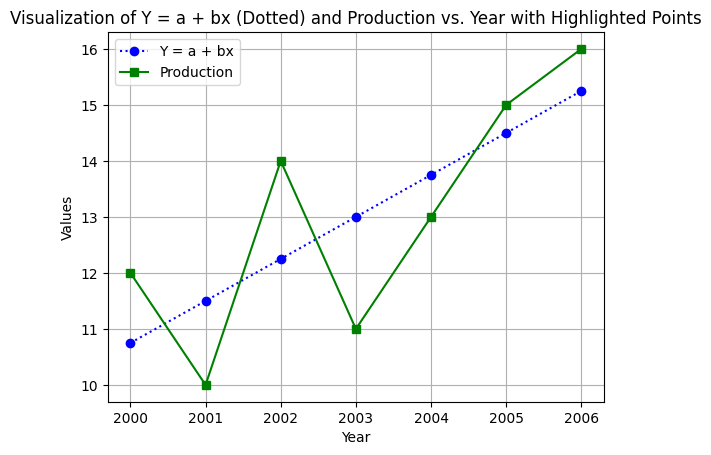

In [48]:
plt.plot(
    df['Year (X)'], 
    df['Y = a + bx'], 
    linestyle='dotted', 
    marker='o', 
    color='blue', 
    label='Y = a + bx'
)

# Plot 'Production' as a solid line with markers
plt.plot(
    df['Year (X)'], 
    df['Production (Y)'], 
    linestyle='solid', 
    marker='s', 
    color='green', 
    label='Production'
)

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Visualization of Y = a + bx (Dotted) and Production vs. Year with Highlighted Points')
plt.legend()
plt.grid(True)

plt.show()